In [ ]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
len(x_train)

50000

In [ ]:
len(x_test)

10000

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np



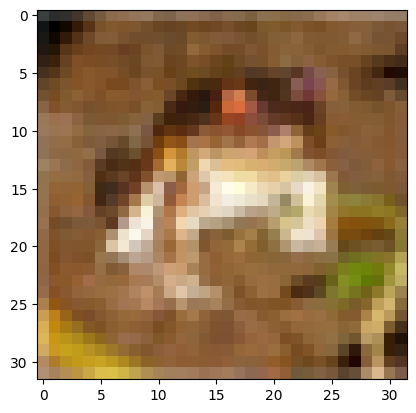

In [ ]:
plt.imshow(x_train[0],cmap=cm.CMRmap)
plt.show()

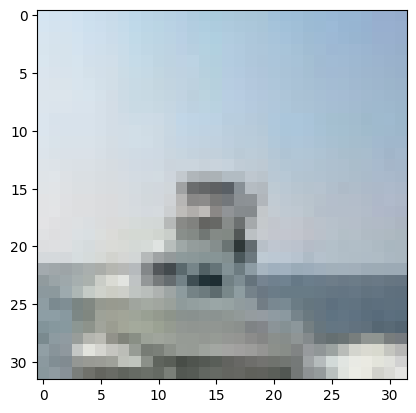

In [ ]:
plt.imshow(x_train[100],cmap=cm.CMRmap)
plt.show()

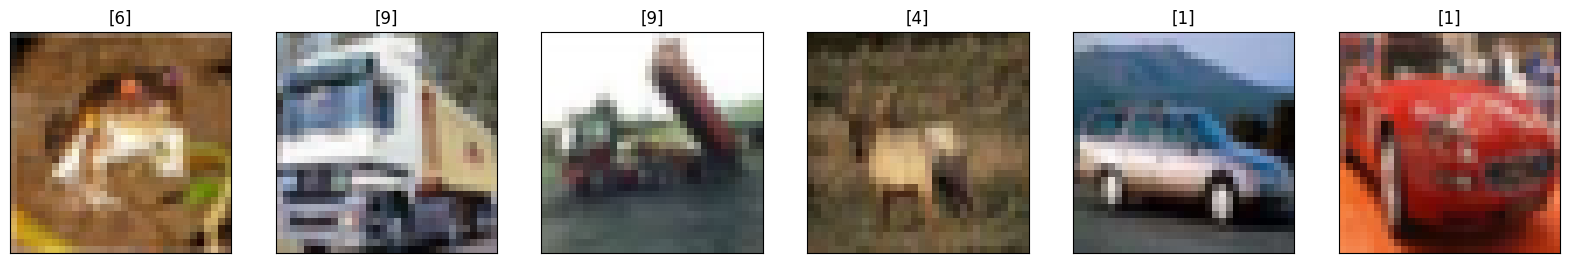

In [ ]:
fig=plt.figure(figsize=(20,20))

for i in range(0, 6):
  ax=fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(x_train[i],cmap='CMRmap')
  ax.set_title(str(y_train[i]))
plt.show()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train[0].max()

np.uint8(255)

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train[0].min()

np.float32(0.0)

In [ ]:
x_train[0].max()

np.float32(1.0)

In [ ]:
y_train.ndim

2

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
len(np.unique(y_train))

10

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train[0].ndim

3

In [ ]:
import numpy as np
from  google.colab.patches import cv2_imshow
import cv2,os,json,random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test.ndim

2

In [ ]:
model = Sequential([
    Conv2D(120, kernel_size=(2, 2),padding='same', activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(150, kernel_size=(2, 2),padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stop=EarlyStopping(monitor='val_accuracy',patience=5,verbose=1)
checkpoint=ModelCheckpoint('model.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1,validation_split=0.3,callbacks=[early_stop,checkpoint])

Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2376 - loss: 2.0508
Epoch 1: val_accuracy improved from -inf to 0.47607, saving model to model.keras
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2378 - loss: 2.0503 - val_accuracy: 0.4761 - val_loss: 1.4957
Epoch 2/100
345/350 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4397 - loss: 1.5648
Epoch 2: val_accuracy improved from 0.47607 to 0.54453, saving model to model.keras
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4401 - loss: 1.5639 - val_accuracy: 0.5445 - val_loss: 1.3067
Epoch 3/100
345/350 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5221 - loss: 1.3523
Epoch 3: val_accuracy improved from 0.54453 to 0.57907, saving model to model.keras
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5221 - loss: 1.3520 - val_accuracy: 0.5791 - val_loss: 1.1898
Epoch 4/100
344/350 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5522 - loss: 1.2520
Epoch 4: val_accuracy improved from 0.57907 to 0.60

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print('Test Loss:',loss)
print('Test Accuracy:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7250 - loss: 0.8467
Test Loss: 0.8446772694587708
Test Accuracy: 0.7254999876022339


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 120)    │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 150)    │        72,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 150)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1350)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │       202,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,742 (2.12 MB)

 Trainable params: 277,870 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 277,872 (1.06 MB)

In [ ]:
y_pred=model.predict(x_test)
cifar10_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


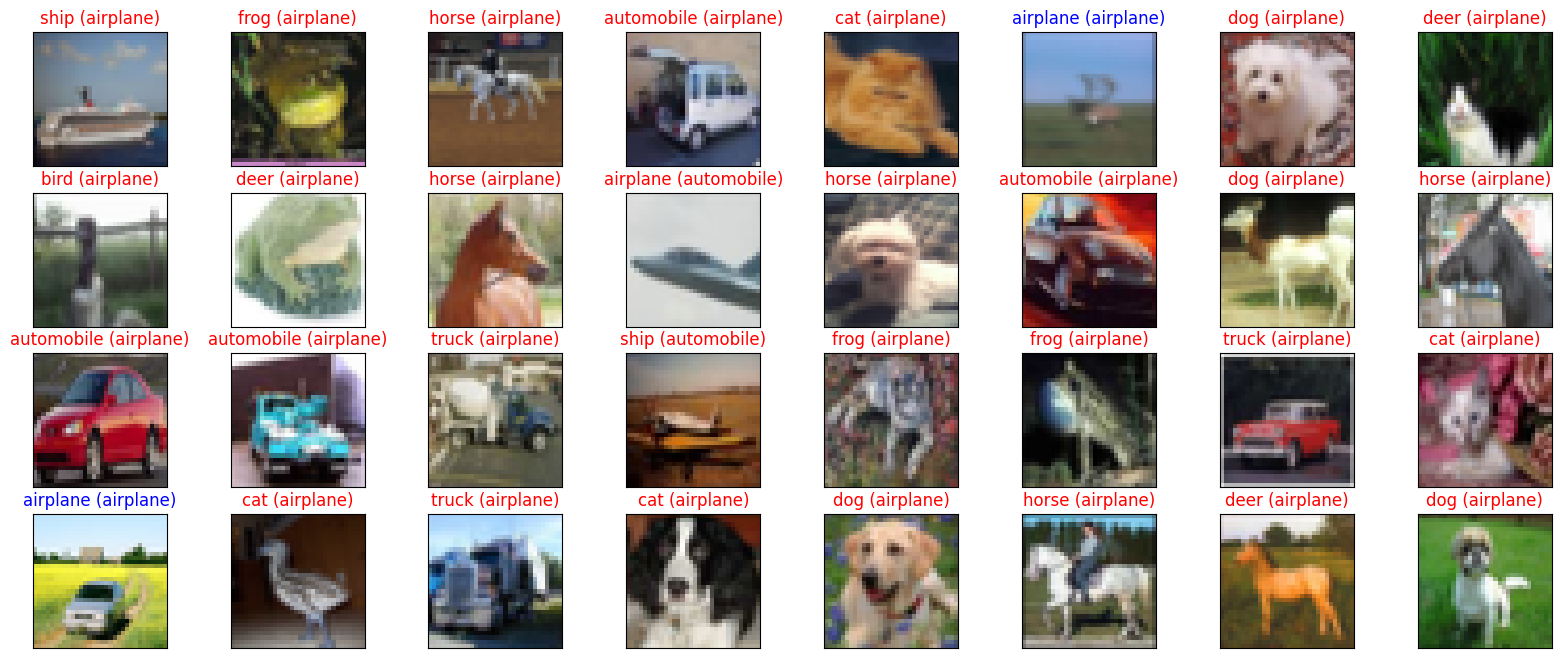

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
  ax= fig.add_subplot(4, 8, i + 1 ,xticks=[], yticks=[])
  ax.imshow(x_test[idx])
  pred_idx= np.argmax(y_pred[idx])
  #true_idx= np.argmax(y_test[idx])
  true_idx=int(y_test[idx][0])
  ax.set_title("{} ({})".format(cifar10_labels [pred_idx], cifar10_labels [true_idx]), color=("blue" if pred_idx== true_idx else "red"))

In [ ]:
cifar10_labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

**image 1-aeroplane**

In [ ]:
from  google.colab.patches import cv2_imshow
import cv2,os,json,random

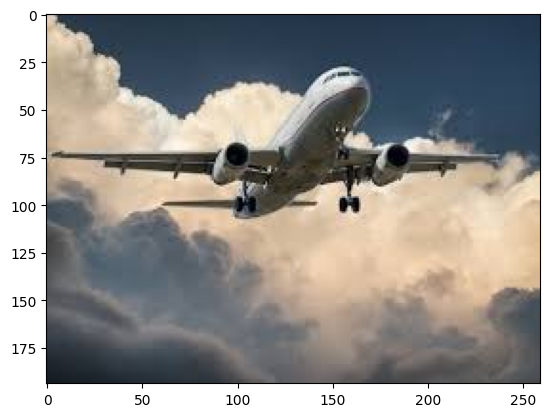

In [ ]:
aer_img =mpimg.imread('/content/aeroplane.jpg')
plt.imshow(aer_img)

In [ ]:
aer_img.shape

(194, 259, 3)

In [ ]:
aer_img.max()

np.uint8(255)

In [ ]:
aer_img=aer_img.astype('float32')/255

In [ ]:
aer_img.shape

(194, 259, 3)

In [ ]:
aer_img.max()

np.float32(1.0)

In [ ]:
aer_img.min()

np.float32(0.0)

In [ ]:
resize_aer=cv2.resize(aer_img,(32,32))
resize_aer.shape

(32, 32, 3)

In [ ]:
pred_aer=model.predict(resize_aer.reshape(1,32,32,3))
pred_aer

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


array([[9.9779010e-01, 3.5593010e-07, 1.2231797e-03, 4.6720277e-05,
        2.1769496e-04, 4.9030042e-04, 3.6262004e-11, 2.3066899e-04,
        9.2442116e-07, 2.5450264e-08]], dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_aer)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: airplane


**image 2- bird**

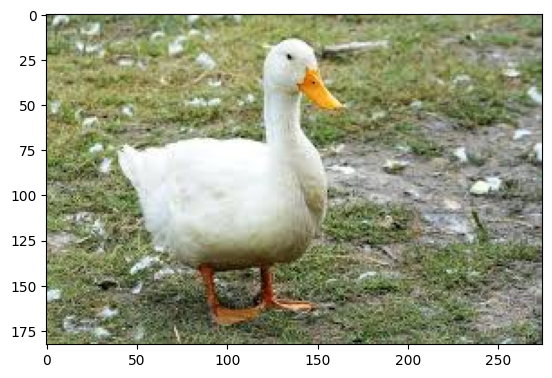

In [ ]:
bir_img=mpimg.imread('/content/bird.jpg')
plt.imshow(bir_img)

In [ ]:
bir_img.shape

(183, 275, 3)

In [ ]:
bir_img.max()

np.uint8(255)

In [ ]:
bir_img=bir_img.astype('float32')/255

In [ ]:
bir_img.max()

np.float32(1.0)

In [ ]:
bir_img.min()

np.float32(0.0)

In [ ]:
resize_bir=cv2.resize(bir_img,(32,32))
resize_bir.shape

(32, 32, 3)

In [ ]:
pred_bir=model.predict(resize_bir.reshape(1,32,32,3))
pred_bir

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.0681504 , 0.03876619, 0.20718434, 0.11702079, 0.13195367,
        0.11004095, 0.06811395, 0.18579108, 0.02533837, 0.04764025]],
      dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_bir)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: bird


**image - 3 cat**

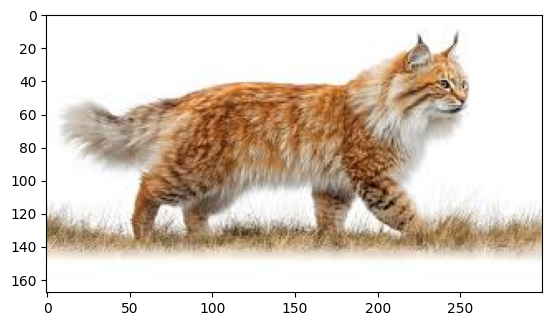

In [ ]:
cat_img=mpimg.imread('/content/cat.jpg')
plt.imshow(cat_img)

In [ ]:
cat_img.shape

(168, 300, 3)

In [ ]:
cat_img.max()

np.uint8(255)

In [ ]:
cat_img=cat_img.astype('float32')/255

In [ ]:
cat_img.max()

np.float32(1.0)

In [ ]:
cat_img.min()

np.float32(0.0)

In [ ]:
resize_cat=cv2.resize(cat_img,(32,32))
resize_cat.shape

(32, 32, 3)

In [ ]:
pred_cat=model.predict(resize_cat.reshape(1,32,32,3))
pred_cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.00265207, 0.00062816, 0.00776118, 0.2570937 , 0.02376708,
        0.09503996, 0.5960364 , 0.00335431, 0.00151449, 0.01215264]],
      dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_cat)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: frog


**image - 4 deer**

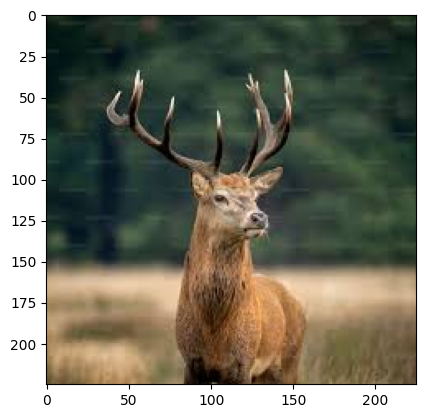

In [ ]:
de_img=mpimg.imread('/content/deer.jpg')
plt.imshow(de_img)

In [ ]:
de_img.shape

(225, 225, 3)

In [ ]:
de_img.max()

np.uint8(255)

In [ ]:
de_img=de_img.astype('float32')/255

In [ ]:
de_img.max()

np.float32(1.0)

In [ ]:
de_img.min()

np.float32(0.0)

In [ ]:
resize_de=cv2.resize(de_img,(32,32))
resize_de.shape

(32, 32, 3)

In [ ]:
pred_de=model.predict(resize_de.reshape(1,32,32,3))
pred_de

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[2.3811695e-06, 8.6711905e-12, 4.7772909e-03, 5.2210939e-04,
        9.9439573e-01, 5.1518160e-05, 9.5324054e-07, 2.4950659e-04,
        4.5279461e-07, 6.3408612e-11]], dtype=float32)

In [ ]:
predicted_class = np.argmax(pred_de)

print("Predicted label:", cifar10_labels[predicted_class])

Predicted label: deer
